# Train Neural Network on Graduate School Admission

Data obtained from [UCLA](https://stats.idre.ucla.edu/stat/data/binary.csv) <br>
The same dataset is on [kaggle.com](https://www.kaggle.com/malapatiravi/graduate-school-admission-data)
<br>
The objective of this exercise is to predict if a student will be admitted to a graduate program based on the features provided in the dataset. Use a network with one output layer with one unit. For this particular case use a sigmoid function for the output unit activation. This dataset has three input features: GRE score, GPA, and the rank of the undergraduate school. Schools with rank 1 have the highest prestige, those with rank 4 have the lowest. 

# Explore the Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
%matplotlib inline

In [2]:
df = pd.read_csv('admissions_binary.csv')

In [3]:
df.head(5)

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [4]:
#Size of data
df.shape

(400, 4)

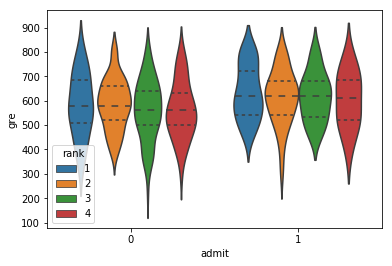

In [5]:
# Draw a combination of boxplot and kernel density estimate for gre vs admittance
sns.violinplot(x="admit", y="gre", data=df, hue = "rank", inner= "quartile");

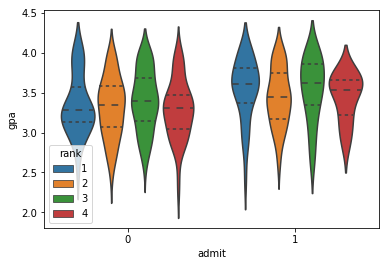

In [6]:
# Draw a combination of boxplot and kernel density estimate for gpa vs admittance
sns.violinplot(x="admit", y="gpa", data=df, hue = "rank", inner= "quartile");

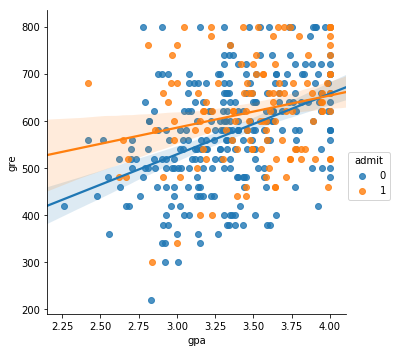

In [7]:
# Look at scatter of admittance for gpa vs gre scatter
sns.lmplot('gpa', 'gre', data=df, hue='admit', fit_reg=True);

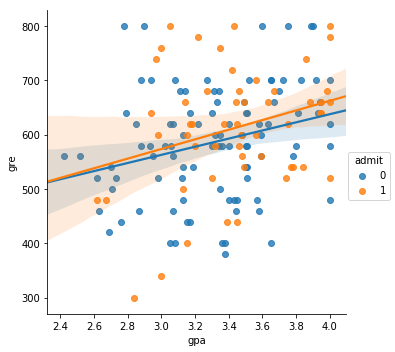

In [8]:
# Look at scatter of admittance for gpa vs gre scatter for rank 2
sns.lmplot('gpa', 'gre', data=df[df['rank'] == 2], hue='admit', fit_reg=True);

# Data Cleaning

In [9]:
#Create dummy variables for rank
df_dum = pd.get_dummies(df['rank'], prefix = 'rank')
df_dum.head(5)

,rank_1,rank_2,rank_3,rank_4
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1


In [10]:
#concatenate with df and drop rank columns
df_concat = pd.concat([df, df_dum], axis = 1)
#Drop the redundant column
df_rank = df_concat.drop('rank', axis = 1)
df_rank.head(5)

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,380,3.61,0,0,1,0
1,1,660,3.67,0,0,1,0
2,1,800,4.00,1,0,0,0
3,1,640,3.19,0,0,0,1
4,0,520,2.93,0,0,0,1


Sigmoid function can 'squash' really small and really big inputs. Then the gradient of really small and large inputs is zero, which means that the gradient descent step will go to zero. If the gradient descent step is 0 then the network won't train.<br>
So, it is better to standardize the gre and gpa scores.

In [11]:
#standardize gre and gpa scores

df_std = df_rank #assign df_std as standardized dataframe

for feature in ['gre', 'gpa']: #list the columns to standardize
    mean = np.mean(df_std[feature]) # get the mean of the feature
    std = np.std(df_std[feature]) # get the standard dev
    df_std.loc[:, feature] = (df_std[feature] - mean)/std #go row by row for each feature

df_std.head(5)

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,-1.800263,0.579072,0,0,1,0
1,1,0.626668,0.736929,0,0,1,0
2,1,1.840134,1.605143,1,0,0,0
3,1,0.453316,-0.525927,0,0,0,1
4,0,-0.586797,-1.209974,0,0,0,1


In [12]:
#random seed
#Note that random can severly affect accuracy of neural net
np.random.seed(42)

In [13]:
#pick the indeces to randomly pick as testing data
sample_index = np.random.choice(df_std.index, size = int(len(df_std) * 0.9), replace= 0)

In [14]:
#training data
train_data = df_std.loc[sample_index]

#testing data
test_data = df_std.drop(sample_index)

In [15]:
#split train data between features and targets
features, targets = train_data.drop(['admit'], axis = 1), train_data['admit']

In [16]:
#repeat for test data
features_test, targets_test = test_data.drop(['admit'], axis = 1), test_data['admit']

# Neural Net

In [17]:
#sigmoid function
def sigmoid (x):
    return 1/(1 + np.exp(-x))
#note sigmoid_prime = sigmoid(x) * (1 - sigmoid(x))

In [18]:
n_records, n_features = features.shape
print("There are {} features and {} records".format(n_features, n_records))

There are 6 features and 360 records


In [19]:
#Initilize last loss to 0
last_loss = 0

In [20]:
#initilize weights
#spread of distribution no more than sqrt(n_features)
weights = np.random.normal(scale = (1 / n_features**0.5), size= n_features)

In [21]:
# epochs
epochs = 1000
#learning rate
learnrate = 0.5

In [22]:

for e in range(epochs): #Repeat for e epochs
    #Set weight step to zero
    del_w = np.zeros(weights.shape)
    # for each record in training data
    for x, y in zip(features.values, targets):

        # Calculate the output, make a forward pass
        output = sigmoid(np.dot(x, weights))

        # Calculate the error
        error = y - output

        # Calculate the error term
        error_term = error * output * (1 - output)

        # Calculate the change in weights for this sample and add it to the total weight change
        del_w += error_term * x


    # Update weights using the learning rate
    # Averaging the weight steps to help reduce any large variations in the training data
    weights += learnrate * del_w / n_records


    # Printing out the mean square error on the training set
    if e % (epochs / 10) == 0:
        out = sigmoid(np.dot(features, weights))
        loss = np.mean((out - targets) ** 2)
        if last_loss and last_loss < loss:
            print("Train loss: {}  WARNING - Loss Increasing".format(loss))
        else:
            print("Train loss: {}".format(loss))
        last_loss = loss

Train loss: 0.25452965923204585
Train loss: 0.2094772384947026
Train loss: 0.20139457291075544
Train loss: 0.19893739198100302
Train loss: 0.19797023909537512
Train loss: 0.19752222935599753
Train loss: 0.1972913842791396
Train loss: 0.1971634254455282
Train loss: 0.19708870014436566
Train loss: 0.1970433586402934


In [23]:
# Calculate accuracy on test data
test_out = sigmoid(np.dot(features_test, weights))
predictions = test_out > 0.5 #If test_out is bigger than 0.5 then student is admitted
accuracy = np.mean(predictions == targets_test)
print("Prediction accuracy: {:.4f}".format(accuracy))

Prediction accuracy: 0.7250


# Neural Net With Backpropagation

Repeat the work done in previous section, see how a back propagation helps. <br>
Add a middle 'hidden' layer.

In [24]:
#Number of hidden units
n_hidden = 2

In [25]:
#Reinitialize last loss to 0
last_loss = None

In [26]:
#Learning rate for backpropagation
learnrate_back = 0.05

In [27]:
#Initilize weights 
weights_input_hidden = np.random.normal(scale = (1 / n_features**0.5), size= (n_features, n_hidden))
weights_hidden_output = np.random.normal(scale = (1 / n_features**0.5), size= n_hidden)

In [28]:
for e in range(epochs):
    del_w_input_hidden = np.zeros(weights_input_hidden.shape)
    del_w_hidden_output = np.zeros(weights_hidden_output.shape)
    for x, y in zip(features.values, targets):
        ## Forward pass ##
        #Calculate the output
        hidden_input = np.dot(x, weights_input_hidden) #dot product order must satisfy matrix multiplication rules
        hidden_output = sigmoid(hidden_input)

        output = sigmoid(np.dot(hidden_output, weights_hidden_output))

        #Backward pass part:
        # Prediction error
        error = y - output

        # Error term for the output unit
        output_error_term = error * output * (1 - output)

        #propagate errors to hidden layer

        # hidden layer error
        hidden_error = np.dot(output_error_term, weights_hidden_output)

        # Error term for the hidden layer
        hidden_error_term = hidden_error * hidden_output * (1 - hidden_output)

        # Update change in weights
        del_w_hidden_output += output_error_term * hidden_output
        del_w_input_hidden += hidden_error_term * x[:, None]

    # Update weights
    weights_input_hidden += learnrate_back * del_w_input_hidden / n_records
    weights_hidden_output += learnrate_back * del_w_hidden_output / n_records

    # Printing out the mean square error on the training set
    if e % (epochs / 10) == 0:
        hidden_output = sigmoid(np.dot(x, weights_input_hidden))
        out = sigmoid(np.dot(hidden_output,
                             weights_hidden_output))
        loss = np.mean((out - targets) ** 2)

        if last_loss and last_loss < loss:
            print("Train loss: {} WARNING - Loss Increasing".format(loss))
        else:
            print("Train loss: {}".format(loss))
        last_loss = loss



Train loss: 0.26354501333682245
Train loss: 0.251939177958531
Train loss: 0.24328250000874888
Train loss: 0.2368676612295796
Train loss: 0.23212748965155888
Train loss: 0.22862778438977246
Train loss: 0.22604444956928452
Train loss: 0.22413860370816158
Train loss: 0.2227350002281454
Train loss: 0.2217050469061618


In [29]:
# Calculate accuracy on test data
hidden = sigmoid(np.dot(features_test, weights_input_hidden))
out_back = sigmoid(np.dot(hidden, weights_hidden_output))
predictions = out_back > 0.5
accuracy = np.mean(predictions == targets_test)
print("Prediction accuracy: {:.3f}".format(accuracy))



Prediction accuracy: 0.750


A Very small increase in accuracy.